# Code for geometry files

### Importing the geometry file

In [1]:

import numpy as np
import random 


img = np.loadtxt('1024x1024_N128_numpy.geom')
print(img)
img.shape


[[56. 56. 56. ... 56. 56. 56.]
 [56. 56. 56. ... 56. 56. 56.]
 [56. 56. 56. ... 56. 56. 56.]
 ...
 [56. 56. 56. ... 56. 56. 56.]
 [56. 56. 56. ... 56. 56. 56.]
 [56. 56. 56. ... 56. 56. 56.]]


(1024, 1024)

## What I want to do

Import numpy
Import scypy 

Load inn array
Pick ij coordinate at radom (1,1022)
Image coordinate (i,j)
See if the coordinates are the same
If not the same load the coordinates into a text file


# Pratheeks Way

In [3]:
import matplotlib.pyplot as plt
up = np.roll(img,1, axis =0)
#print(up)
down = np.roll(img,-1, axis =0)
right = np.roll(img,1, axis = 1)
left = np.roll(img,-1, axis = 1)

a_3d_array = np.array([img,up,down,right,left])

#
print(np.shape(a_3d_array))

#print(a_3d_array[1,:,:])

unique_points = np.unique(a_3d_array, axis = 0)

#print(unique)
np.set_printoptions(threshold=np.inf)
#print(unique)










(5, 1024, 1024)


# My old way --> shows too many points to be tripple points.

In [23]:


#Trying to identify triple points in the microstrucutre

import matplotlib.pyplot as plt
    
grad = np.gradient(img)

boundaries = grad[0] + grad[1]

boundaries = np.abs(boundaries) > 0.1
#plt.figure(figsize=(30, 30))
#plt.imshow(boundaries)
#print(boundaries)

num_bound = boundaries*1

#print(num_bound)

#plt.figure(figsize=(30, 30))
#plt.imshow(num_bound)


up = np.roll(num_bound,1, axis =0)
down = np.roll(num_bound,-1, axis =0)
right = np.roll(num_bound,1, axis = 1)
left = np.roll(num_bound,-1, axis = 1)

num_total = up + right + left + num_bound + down

#print(num_total)


triple_junct = []

for yidx, y_vals in enumerate(num_total):
    for xidx, x_vals in enumerate(y_vals):
        if x_vals > 4:
            triple_junct.append([xidx, yidx])
            

print(len(triple_junct))
    

2327


In [18]:
import matplotlib.pyplot as plt

#np.set_printoptions(threshold=np.inf)







In [79]:
up = np.roll(img,1, axis =0)
down = np.roll(img,-1, axis =0)
right = np.roll(img,1, axis = 1)
left = np.roll(img,-1, axis = 1)




In [63]:
#Where the gradient is not zero we have a grain boundary (in both the x,y)

grad = np.gradient(img)

boundaries = grad[0] + grad[1]

boundaries = np.abs(boundaries) > 0.1


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



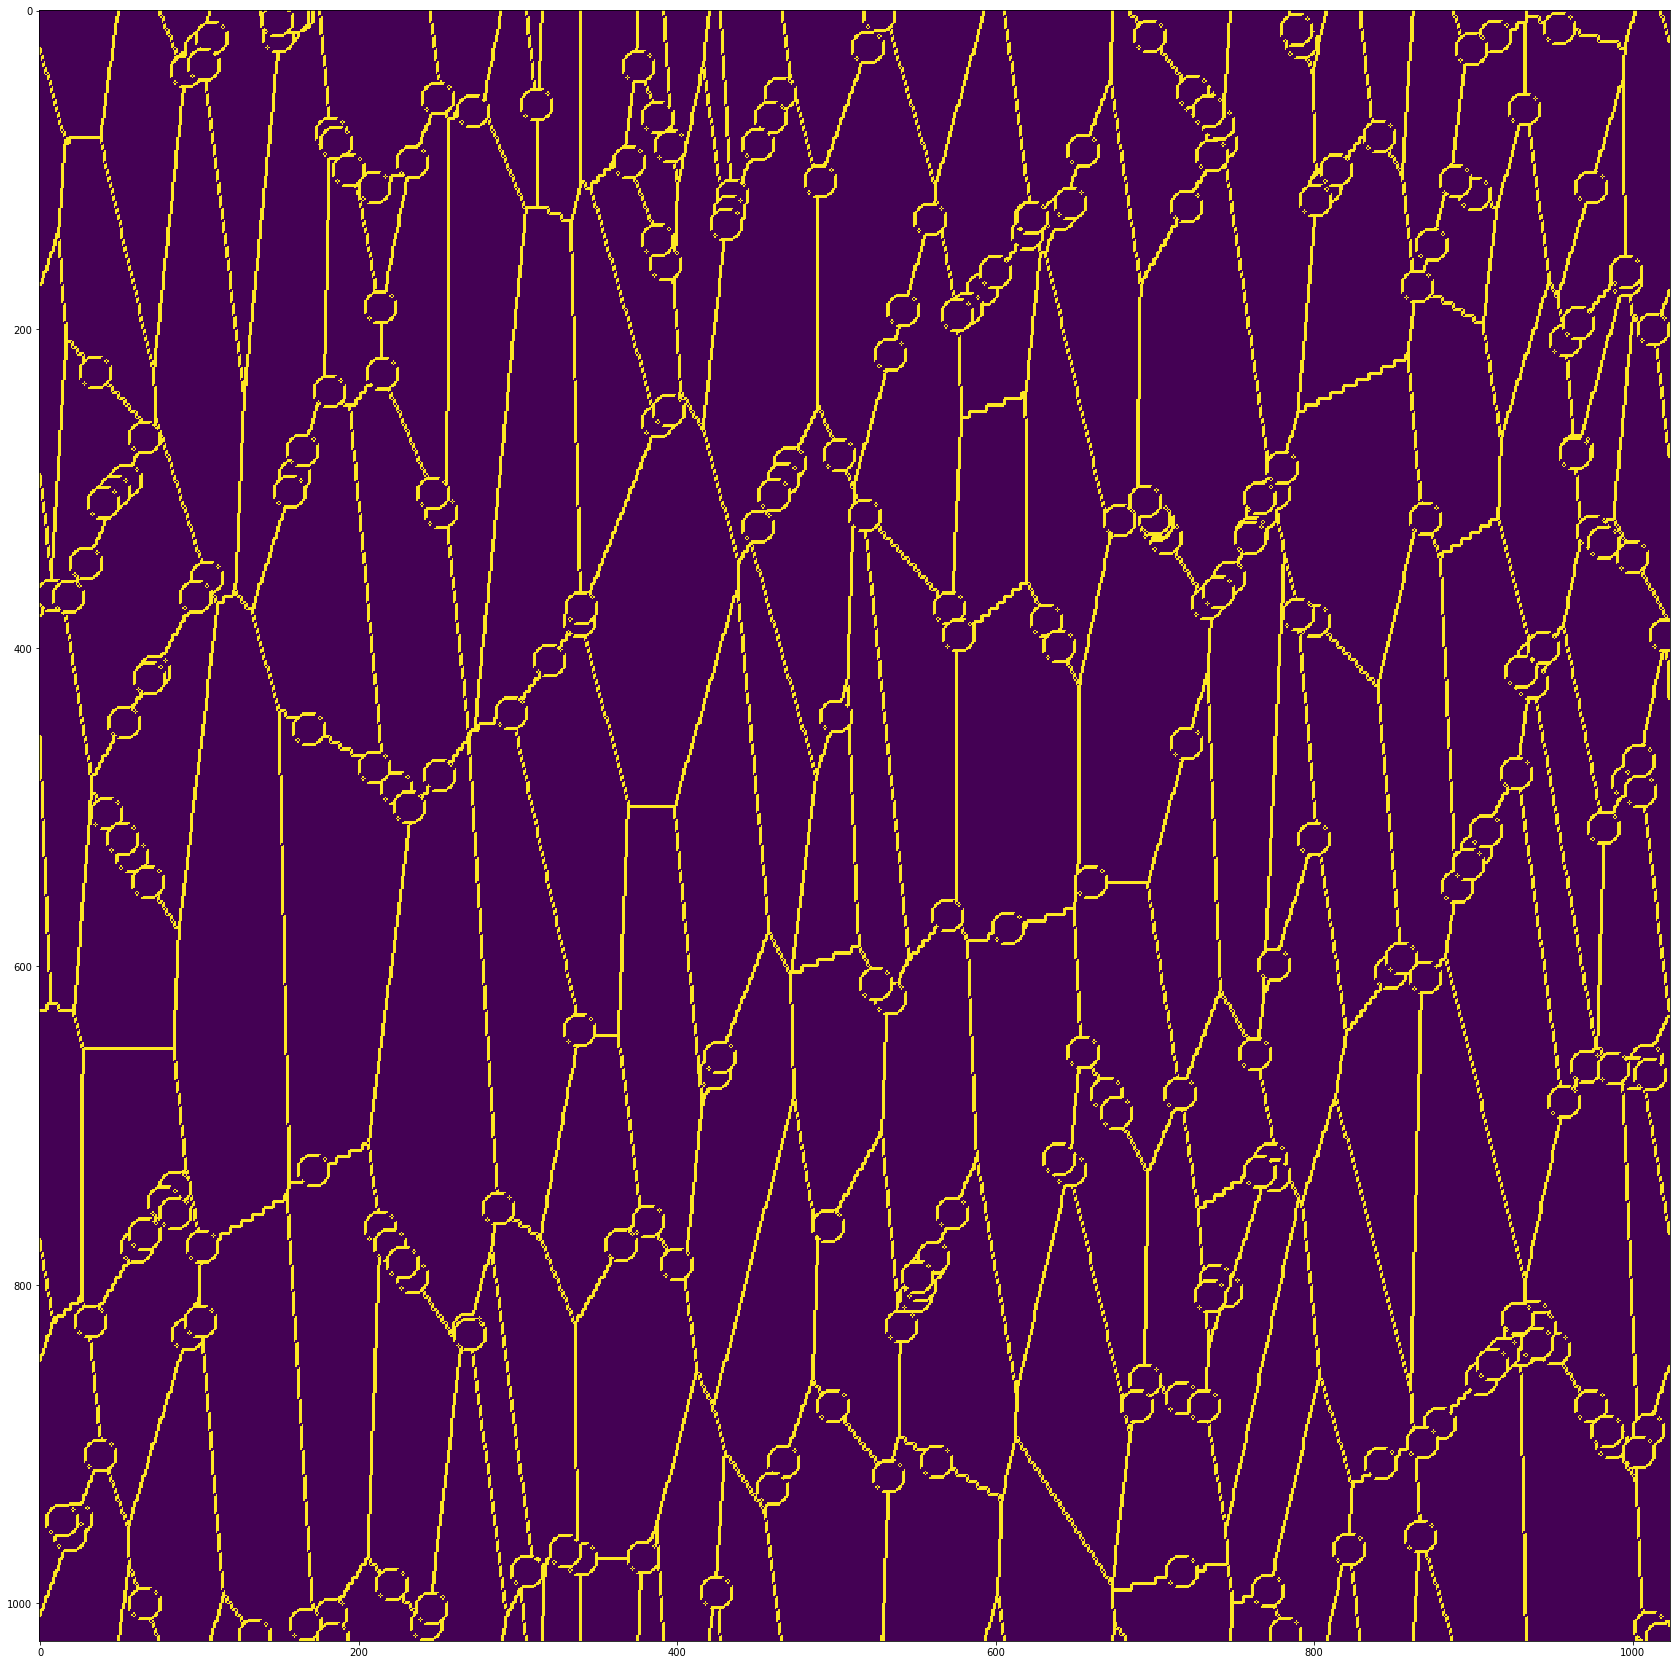

In [64]:
#Plotting the grain boundaries

plt.figure(figsize=(30, 30))

plt.imshow(boundaries)


print(boundaries)



In [5]:
#Boundaries plots y coordinate first and x coordinate second
boundary_coordinates = []
for yidx, y_vals in enumerate(boundaries):
    for xidx, x_vals in enumerate(y_vals):
        if x_vals == True:
            boundary_coordinates.append([xidx, yidx])
                

print('Total points: {0}'.format(len(boundaries[0])*len(boundaries[1])))
print('Boundary points: {0}'.format(len(boundary_coordinates)))




Total points: 1048576
Boundary points: 60808


In [118]:
#We now want to generate an array of random y ordinates within this shape
random_points = np.random.random_integers(0,len(boundary_coordinates),128)

selected_points = []

for point in random_points:
    selected_points.append(boundary_coordinates[point])

/Users/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 60808 + 1) instead
  


In [119]:
print(selected_points)

[[256, 293], [884, 591], [1007, 453], [25, 599], [90, 384], [916, 308], [750, 794], [197, 272], [466, 295], [530, 672], [259, 349], [365, 597], [867, 958], [339, 76], [899, 328], [725, 656], [915, 499], [474, 53], [154, 441], [624, 195], [648, 109], [848, 605], [219, 618], [859, 45], [148, 50], [793, 420], [50, 2], [103, 30], [1001, 839], [965, 286], [40, 911], [819, 635], [952, 502], [27, 445], [785, 934], [799, 724], [338, 324], [156, 663], [14, 178], [834, 919], [860, 899], [900, 532], [576, 433], [664, 66], [893, 41], [794, 214], [549, 592], [932, 934], [693, 848], [361, 324], [429, 34], [816, 100], [258, 345], [993, 260], [973, 657], [1014, 545], [597, 1012], [51, 942], [651, 554], [156, 675], [727, 111], [102, 460], [71, 903], [457, 565], [123, 356], [670, 338], [511, 320], [621, 219], [931, 382], [865, 734], [5, 558], [917, 296], [58, 983], [822, 948], [289, 752], [608, 13], [255, 917], [746, 33], [1003, 949], [369, 527], [581, 44], [230, 114], [155, 663], [336, 246], [995, 54],

/Users/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: This function is deprecated. Please call randint(0, 60808 + 1) instead
  from ipykernel import kernelapp as app


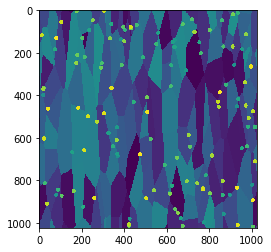

In [2]:
#import numpy as np
#import random
#import matplotlib.pyplot as plt
#img = np.loadtxt('1024x1024_N128_numpy.geom')
#grad = np.gradient(img)
#boundaries = np.abs(grad[0] + grad[1]) > 0.1
#boundary_coordinates = []
#for yidx, y_vals in enumerate(boundaries):
#    for xidx, x_vals in enumerate(y_vals):
#        if x_vals == True:
#            boundary_coordinates.append([xidx, yidx])


#Final bit of code for adding random points into the microstrucutre
X,Y = np.meshgrid(range(1024),range(1024))
seed_radius = 10
for n in range(128):
    random_point = np.random.random_integers(0,len(boundary_coordinates))
    new_img = \
    np.where((X-boundary_coordinates[random_point][0])*(X-boundary_coordinates[random_point][0]) + \
             (Y-boundary_coordinates[random_point][1])*(Y-boundary_coordinates[random_point][1]) < seed_radius*seed_radius, \
             128+n,img)
    img = np.copy(new_img)
    
    
np.savetxt('1024x1024_N128_RX.geom',new_img,fmt='%d')

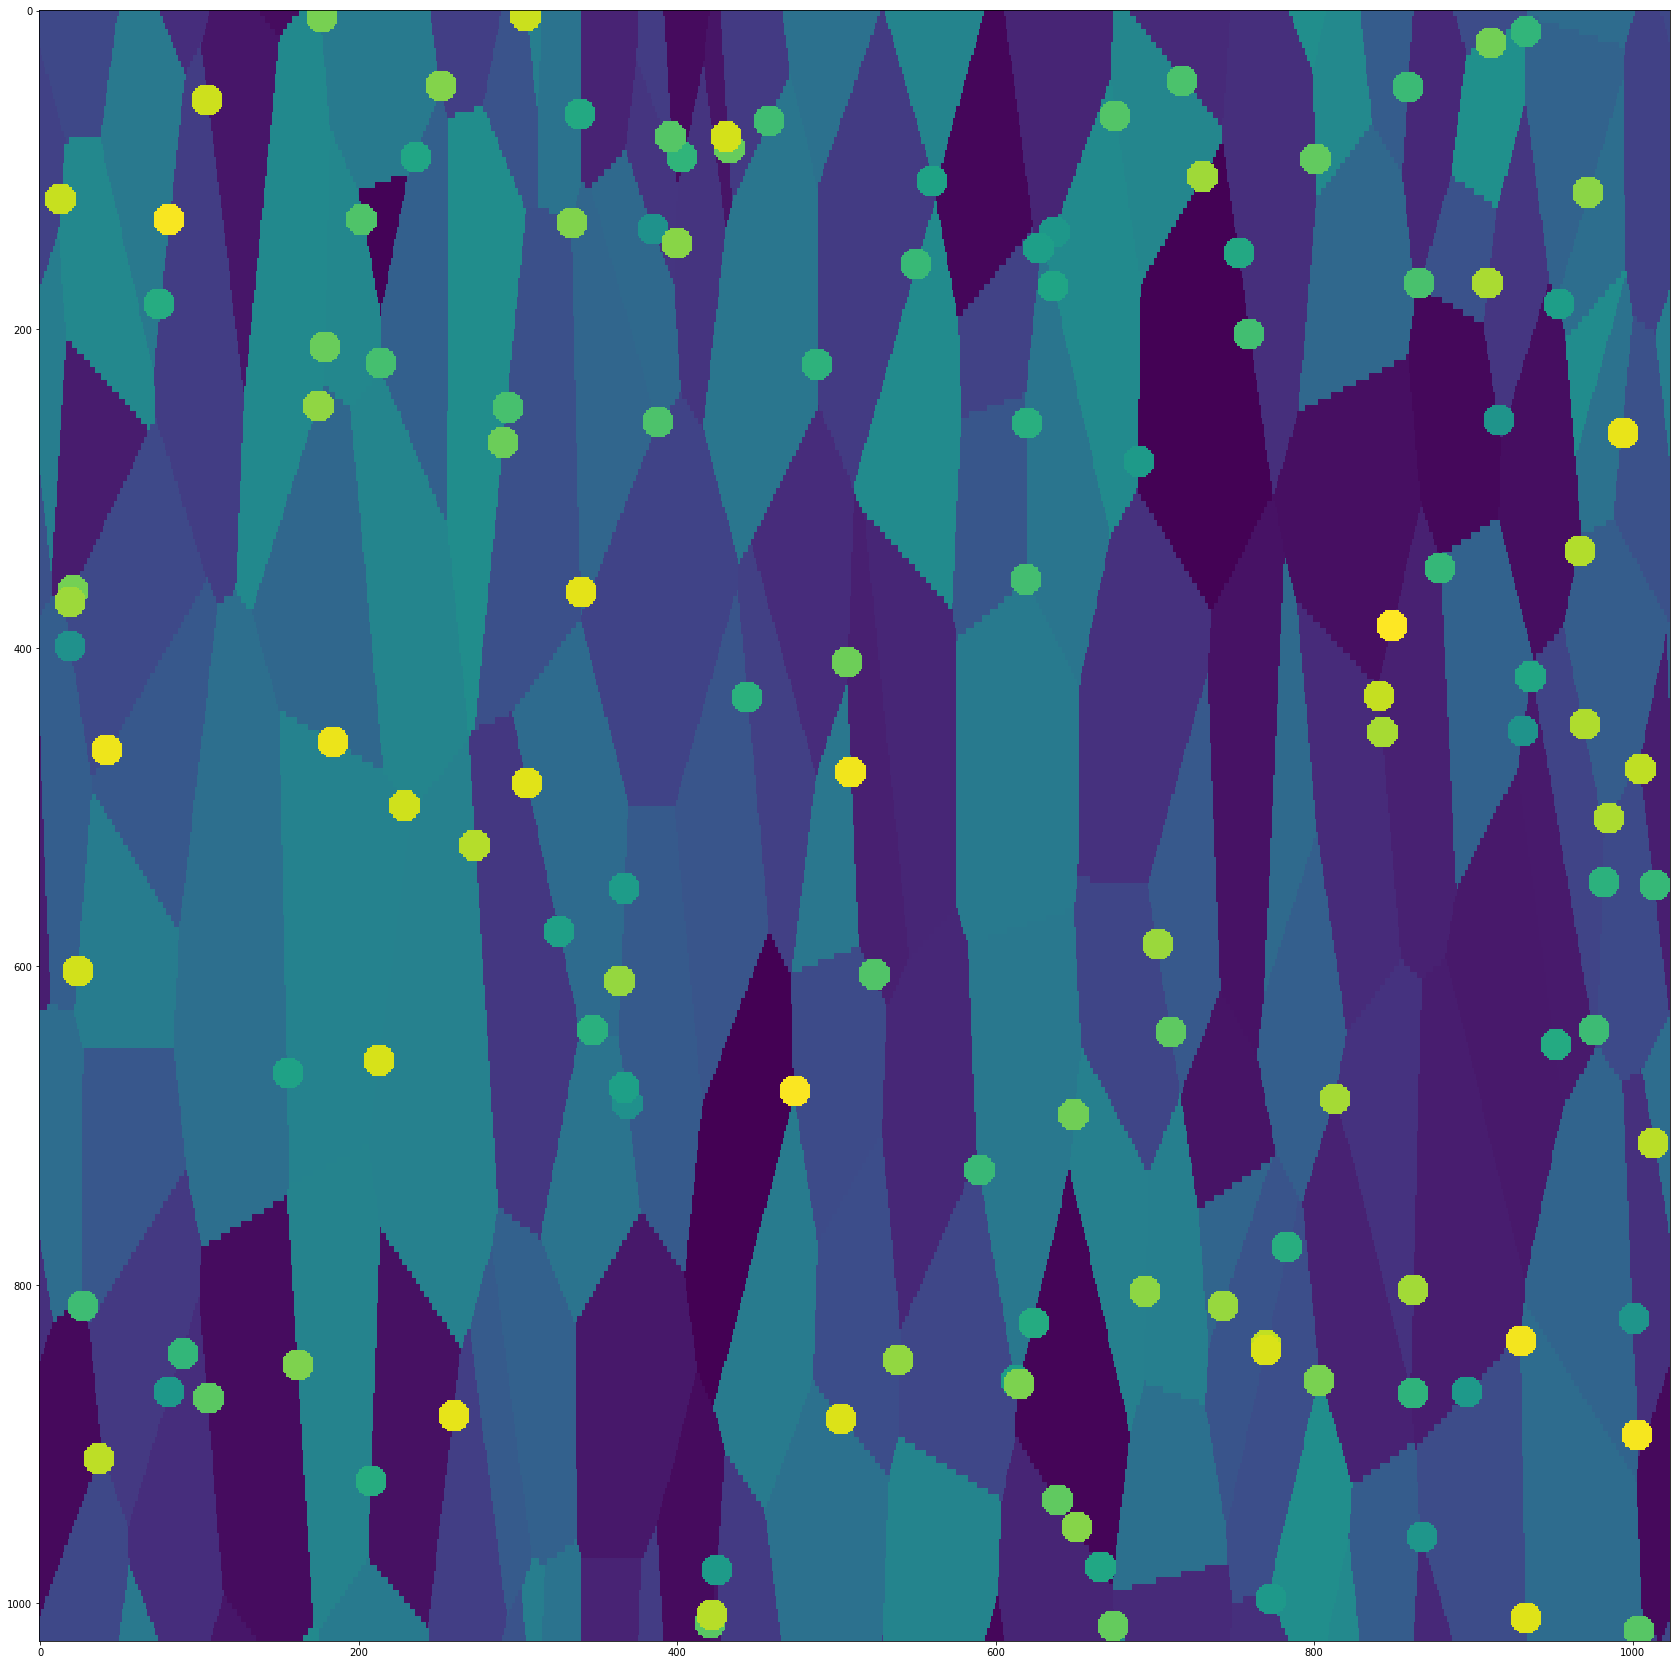

In [3]:
plt.figure(figsize=(30, 30))
plt.imshow(img)